In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('./train.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset.describe(include=['O'])#计算离散型变量的统计特征

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sundman, Mr. Johan Julian",male,1601,G6,S
freq,1,577,7,4,644


In [10]:
for feature in dataset.columns:
    print(feature,dataset[feature].isnull().sum(),'/',dataset.shape[0],'个缺失值')

PassengerId 0 / 891 个缺失值
Survived 0 / 891 个缺失值
Pclass 0 / 891 个缺失值
Name 0 / 891 个缺失值
Sex 0 / 891 个缺失值
Age 177 / 891 个缺失值
SibSp 0 / 891 个缺失值
Parch 0 / 891 个缺失值
Ticket 0 / 891 个缺失值
Fare 0 / 891 个缺失值
Cabin 687 / 891 个缺失值
Embarked 2 / 891 个缺失值


# 测试数据集

In [3]:
test = pd.read_csv('./test.csv')

In [4]:
test.shape

(418, 11)

In [5]:
for feature in test.columns:
    print(feature,test[feature].isnull().sum(),'/',test.shape[0],'个缺失值')

PassengerId 0 / 418 个缺失值
Pclass 0 / 418 个缺失值
Name 0 / 418 个缺失值
Sex 0 / 418 个缺失值
Age 86 / 418 个缺失值
SibSp 0 / 418 个缺失值
Parch 0 / 418 个缺失值
Ticket 0 / 418 个缺失值
Fare 1 / 418 个缺失值
Cabin 327 / 418 个缺失值
Embarked 0 / 418 个缺失值


In [6]:
test.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Keane, Mr. Daniel",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## 生存与特征的关系

In [7]:
survived = dataset[dataset['Survived']==1]
died = dataset[dataset['Survived']==0]

print('生存 %i (%.1f%%)'%(len(survived),len(survived)/len(dataset)*100))
print('死亡 %i (%.1f%%)'%(len(died),len(died)/len(dataset)*100))
print('总数 %i '%(len(dataset)))

生存 342 (38.4%)
死亡 549 (61.6%)
总数 891 


In [8]:
#Pclass dependence 票类数量
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
dataset[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

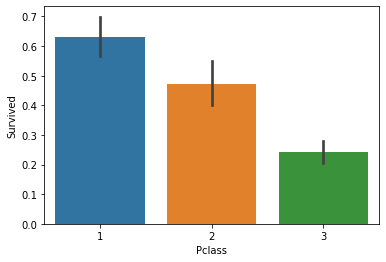

In [10]:
sns.barplot(x='Pclass', y='Survived', data=dataset)#生存率与票类的关系

<AxesSubplot:>

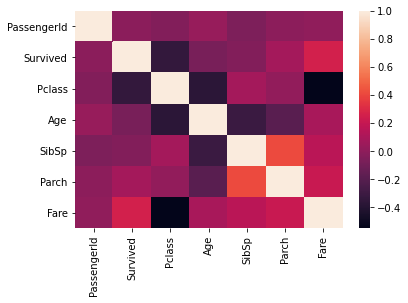

In [11]:
sns.heatmap(dataset.corr())

## 性别与生存的关系

In [12]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
dataset.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [14]:
dataset[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

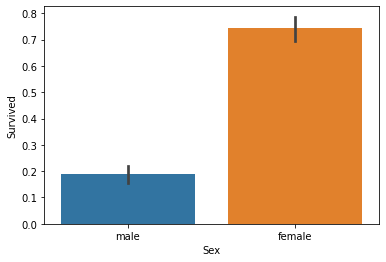

In [15]:
sns.barplot(x = 'Sex', y = 'Survived', data = dataset)

In [16]:
tab = pd.crosstab(dataset['Pclass'], dataset['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

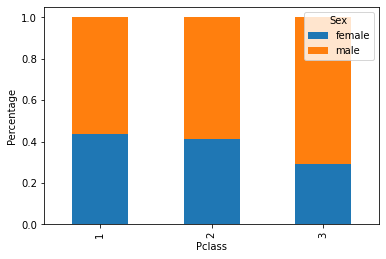

In [17]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')#百分比

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


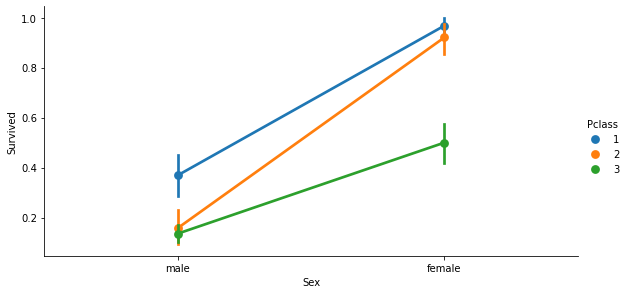

In [18]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=dataset)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


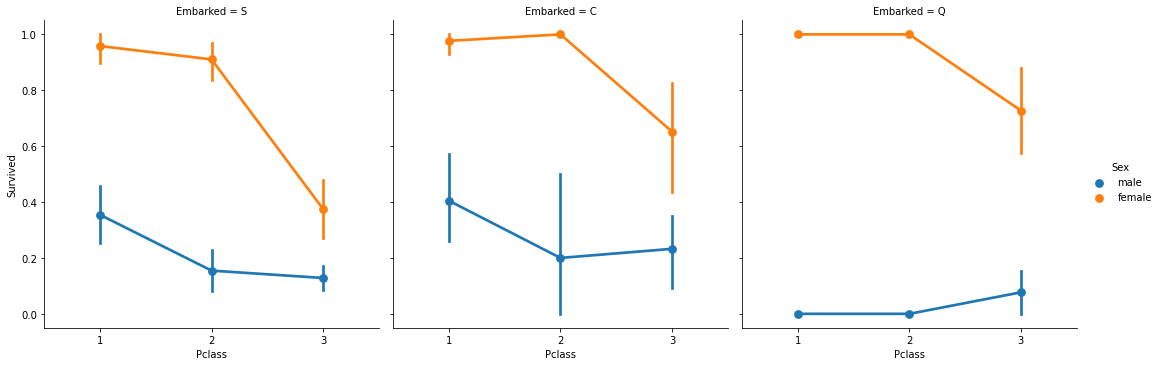

In [19]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=dataset)

## 港口和生存率的关系

In [20]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
dataset.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

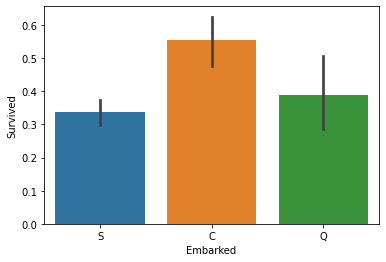

In [22]:
sns.barplot(x = 'Embarked',y = 'Survived', data = dataset)

In [23]:
dataset[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## 父母孩子与生存率的关系

In [24]:
dataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
dataset.groupby('Survived').Parch.value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

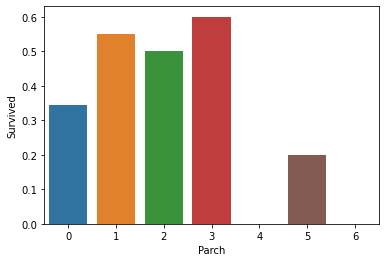

In [26]:
sns.barplot(x = 'Parch',y = 'Survived', ci = None,data = dataset)

In [27]:
dataset[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


## 同代和配偶数量与生存率的关系

In [28]:
dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
dataset.groupby('Survived').SibSp.value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

In [30]:
dataset[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

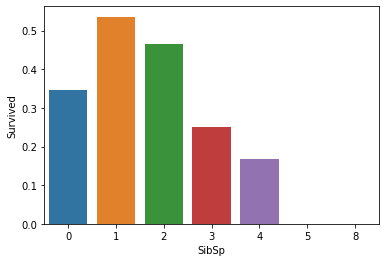

In [31]:
sns.barplot(x = 'SibSp', y = 'Survived', ci = None, data = dataset)

## 年龄与生存率的关系

<AxesSubplot:xlabel='Sex', ylabel='Age'>

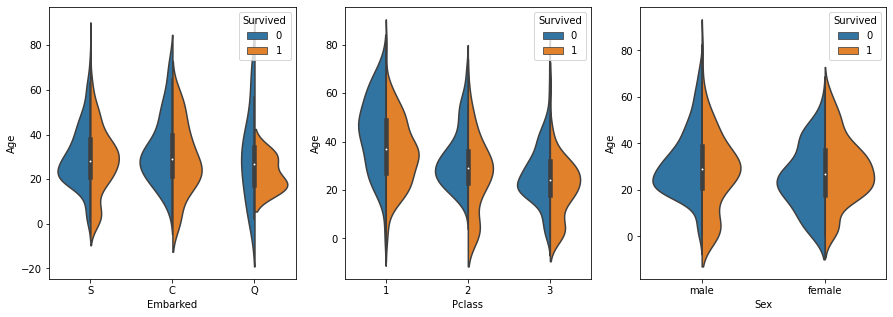

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=dataset, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=dataset, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=dataset, split=True, ax=ax3)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Male Age'>

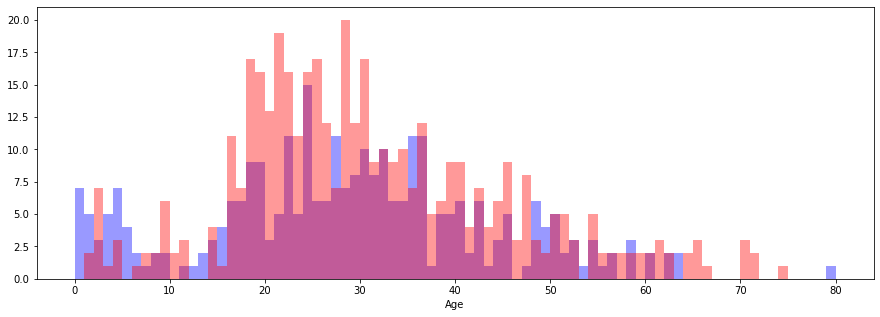

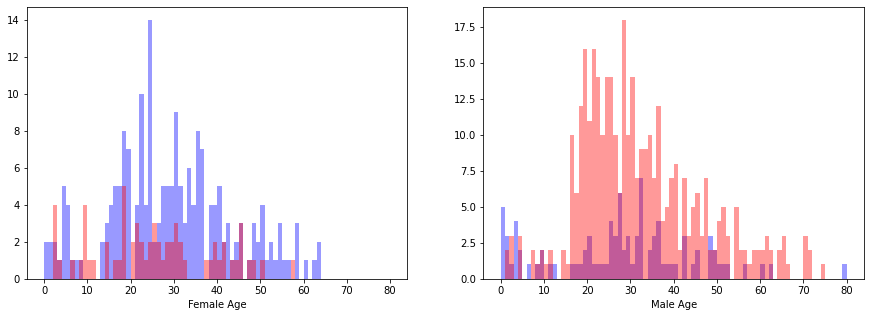

In [33]:
total_survived = dataset[dataset['Survived']==1]
total_not_survived = dataset[dataset['Survived']==0]

male_survived = dataset[(dataset['Survived']==1) & (dataset['Sex']=="male")]
female_survived = dataset[(dataset['Survived']==1) & (dataset['Sex']=="female")]

male_not_survived = dataset[(dataset['Survived']==0) & (dataset['Sex']=="male")]
female_not_survived = dataset[(dataset['Survived']==0) & (dataset['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

## 相关系数

<AxesSubplot:>

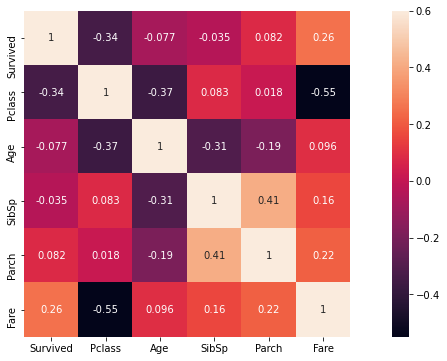

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.drop('PassengerId',axis=1).corr(), vmax=0.6, square= True, annot=True)

# 特征抽取

## 名称特征

In [35]:
train_test_data = [dataset, test] # 合并训练和测试数据集

for data in train_test_data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.')

In [36]:
test['Title'].head()   

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [37]:
pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [38]:
for data in train_test_data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [39]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for data in train_test_data:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

In [40]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 性别特征

In [41]:
#用数字替换性别特征数据
title_mapping = {'female':1,'male':0}
for data in train_test_data:
    data['Sex'] = data['Sex'].map(title_mapping)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


## 出发港特征

In [42]:
## Embarked 
#用最常用的值代替缺失值（S）
for data in train_test_data:
    print(data.Embarked.value_counts())
    print(data.Embarked.isnull().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
2
S    270
C    102
Q     46
Name: Embarked, dtype: int64
0


In [43]:
for data in train_test_data:
    data.Embarked = data.Embarked.fillna('S')

In [44]:
for data in train_test_data:
    data.Embarked = data.Embarked.map({'S':0,'C':1,'Q':2})

In [45]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


## 年龄特征

In [46]:
for data in train_test_data:
    age_mean = data.Age.mean()
    age_std = data.Age.std()
    age_null_value = data.Age.isnull().sum()
    
    age_dataset = np.random.randint(age_mean-age_std,age_mean+age_std,size = age_null_value)
    data['Age'][np.isnan(data.Age)] = age_dataset
    data['Age'] = data['Age'].astype(int)

<ipython-input-46-e8c37902803a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][np.isnan(data.Age)] = age_dataset


In [47]:
#把年龄分成5组
dataset['AgeBand'] = pd.cut(dataset['Age'], 5)  
#dataset.AgeBand.head()
print (dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.531532
1   (16.0, 32.0]  0.347727
2   (32.0, 48.0]  0.380769
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [48]:
for data in train_test_data:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4

In [49]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


## 票价特征

In [50]:
for data in train_test_data:
    data.Fare[np.isnan(data.Fare)] = data.Fare.mean()

<ipython-input-50-275066593f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Fare[np.isnan(data.Fare)] = data.Fare.mean()


In [51]:
#分成4组
dataset['FareBand'] = pd.qcut(dataset['Fare'], 4)  
#dataset.AgeBand.head()
print (dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [52]:
for data in train_test_data:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

In [53]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


## 家庭成员（sibsp&parch）

In [54]:
for data in train_test_data:
    data['Family'] = data['SibSp'] + data['Parch'] + 1
dataset[['Family','Survived']].groupby(['Family'],as_index = False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [55]:
for data in train_test_data:
    data['IsAlone'] = np.where(data['Family']==1,1,0)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [56]:
dataset[['IsAlone','Survived']].groupby(['IsAlone'],as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


# 特征选择

In [57]:
dataset = dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','AgeBand','FareBand','Family'],axis = 1)
test = test.drop(['Name','SibSp','Parch','Ticket','Cabin','Family'],axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


# 建模

In [59]:
X_train = dataset.drop('Survived',axis = 1)
y_train = dataset['Survived']
X_test = test.drop('PassengerId',axis = 1)

In [60]:
models = [LogisticRegression(),SVC(),LinearSVC(),DecisionTreeClassifier(),\
          RandomForestClassifier(n_estimators = 100),KNeighborsClassifier(10),\
         SGDClassifier(max_iter = 100, tol = None),Perceptron(max_iter = 100, tol = None),GaussianNB()]

In [61]:
models_list = ['Logistic Regression','Support Vector Machines','Linear Support Vector Machines',\
               'Decision Tree','Random Forest','k-Nearest Neighbours', 'Stochastic Gradient Descent',\
               'Perceptron','Naive Bayes']
accuracy_list = []

In [62]:
for i in models:
    i.fit(X_train,y_train)
    y_pred_log = i.predict(X_test)
    accuracy = round(100*i.score(X_train,y_train),2)
    print(str(i) + ' 准确率: {}%'.format(accuracy))
    accuracy_list.append(accuracy)

LogisticRegression() 准确率: 80.13%
SVC() 准确率: 83.61%
LinearSVC() 准确率: 79.57%
DecisionTreeClassifier() 准确率: 87.65%


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RandomForestClassifier() 准确率: 87.65%
KNeighborsClassifier(n_neighbors=10) 准确率: 84.4%
SGDClassifier(max_iter=100, tol=None) 准确率: 76.54%
Perceptron(max_iter=100, tol=None) 准确率: 78.9%
GaussianNB() 准确率: 77.67%


In [63]:
models_dataframe = pd.DataFrame({'Models': models_list,'Accuracy':accuracy_list})
models_dataframe.set_index('Models', inplace = True)
models_dataframe.sort_values(by = ['Accuracy'], ascending=False)

,Accuracy
Models,
Decision Tree,87.65
Random Forest,87.65
k-Nearest Neighbours,84.40
Support Vector Machines,83.61
Logistic Regression,80.13
Linear Support Vector Machines,79.57
Perceptron,78.90
Naive Bayes,77.67
Stochastic Gradient Descent,76.54


### 混淆矩阵

In [64]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
y_pred_log = model.predict(X_train)
accuracy = round(100*model.score(X_train,y_train),2)
print(str(model) + ' Accuracy {}%'.format(accuracy))

RandomForestClassifier() Accuracy 87.65%


Confusion Matrix in numbers
[[512  37]
 [ 73 269]]


Confusion Matrix in percents
[[0.93 0.07]
 [0.21 0.79]]




<AxesSubplot:>

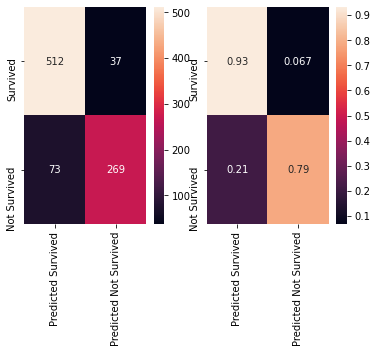

In [65]:
conf_mat = confusion_matrix(y_train,y_pred_log)
rows = ['Survived','Not Survived']
cols = ['Predicted Survived','Predicted Not Survived']
conf_mat_frame = pd.DataFrame(conf_mat,index = rows, columns = cols)

np.set_printoptions(precision = 2)

print('Confusion Matrix in numbers')
print(conf_mat)
print('')
print('')

print('Confusion Matrix in percents')
conf_mat_perc = conf_mat.astype(float)/conf_mat.sum(axis = 1)[:,np.newaxis]
print(conf_mat_perc)
print('')
print('')

conf_mat_perc_frame = pd.DataFrame(conf_mat_perc,index = rows, columns = cols)

plt.figure.figsize = (15,5)

plt.subplot(121)
sns.heatmap(conf_mat_frame, annot = True, fmt='d')

plt.subplot(122)
sns.heatmap(conf_mat_perc_frame, annot = True)

In [66]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


In [67]:
y_pred = model.predict(X_test)

In [68]:
answer = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})

In [69]:
answer.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [70]:
answer.to_csv('./submission.csv',index = False)

In [71]:
c = pd.read_csv('./submission.csv')
c.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
